In [197]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import scipy.stats as sps


sns.set()
pd.set_option("display.precision", 2)

# SCRAPES THE LATEST DATA FROM WORLDOMETERS
url = 'https://www.worldometers.info/coronavirus/#countries'

r = requests.get(url)

c = r.content

soup = bs(c,'html.parser')

foo = soup.findAll('div',{'class' : 'tab-content'})
print (len(foo))

the_div = foo[2]

tbody = the_div.tbody

rows = tbody.findAll('tr')

countries = dict()

for r in rows:
    td = r.findAll('td')
    name = td[0].get_text().strip()
    confirmed = td[1].get_text().strip()
    inc = td[2].get_text().strip()
    deaths = td[3].get_text().strip()
    d_inc = td[4].get_text().strip()
    recovered = td[5].get_text().strip()
    active_cases = td[6].get_text().strip()
    serious = td[7].get_text().strip()
    conf_p_M = td[8].get_text().strip()
    countries[name] = [confirmed,inc,deaths,d_inc,
                       recovered,active_cases,serious,conf_p_M]
    
cols = ['confirmed','inc','dead','dead_inc','recovered',
        'active_cases','serious','confirmed_per_M']

df = pd.DataFrame.from_dict(countries)
df = df.T
df.columns = cols

df[['inc','dead_inc']] = df[['inc','dead_inc']].apply(
    lambda x : x.str.replace('+',''))

df[['confirmed','dead','recovered','active_cases',
    'serious','inc','dead_inc','confirmed_per_M']] = \
    df[['confirmed','dead','recovered','active_cases',
        'serious','inc','dead_inc','confirmed_per_M']].apply(
    lambda x : x.str.replace(',',''))

df[cols] = df[cols].apply(lambda x: x.replace('',np.nan))


df[cols] = df[cols].astype(float)
df['yesterday'] = df['confirmed'] - df['inc']
df['factor'] = df['confirmed'] / df['yesterday']
cols  = ['confirmed', 'yesterday','inc', 'factor','dead', 'dead_inc', 'recovered', 'active_cases',
       'serious', 'confirmed_per_M']

df = df[cols]

#df['factor'].loc[df['factor'] == np.inf]
df['factor'] = df['factor'].replace(np.inf,np.nan)
df['dead_pct'] = 100 * df['dead'] / df['confirmed']
df['dead'] = df['dead'].fillna(0)
df['dead_factor'] = df['dead'].div (df['dead'] - df['dead_inc'])
df['dead_factor'].replace(np.inf,np.nan,inplace=True)
df.head(40)


3


,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor
China,81218.0,81171.0,47.0,1.00,3281.0,4.0,73650.0,4287.0,1399.0,56.0,4.04,1.00
Italy,69176.0,NaN,NaN,NaN,6820.0,NaN,8326.0,54030.0,3393.0,1144.0,9.86,NaN
USA,54935.0,54881.0,54.0,1.00,784.0,4.0,379.0,53772.0,1175.0,166.0,1.43,1.01
Spain,42058.0,NaN,NaN,NaN,2991.0,NaN,3794.0,35273.0,2636.0,900.0,7.11,NaN
Germany,33593.0,32991.0,602.0,1.02,164.0,5.0,3299.0,30130.0,23.0,401.0,0.49,1.03
Iran,24811.0,NaN,NaN,NaN,1934.0,NaN,8913.0,13964.0,NaN,295.0,7.79,NaN
France,22304.0,NaN,NaN,NaN,1100.0,NaN,3281.0,17923.0,2516.0,342.0,4.93,NaN
Switzerland,9991.0,9877.0,114.0,1.01,133.0,11.0,131.0,9727.0,141.0,1154.0,1.33,1.09
S. Korea,9137.0,9037.0,100.0,1.01,126.0,6.0,3730.0,5281.0,59.0,178.0,1.38,1.05
UK,8077.0,NaN,NaN,NaN,422.0,NaN,135.0,7520.0,20.0,119.0,5.22,NaN


In [196]:
df.to_pickle('scrape_df.pkl')
df.agg(['sum','max','min','mean','median','count'])


,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor
sum,425288.00,216241.00,2736.00,60.90,18944.00,54.00,109225.00,297119.00,13129.0,36185.04,450.95,25.76
max,81218.00,81171.00,602.00,2.33,6820.00,11.00,73650.00,54030.00,3393.0,5511.00,33.33,2.00
min,1.00,2.00,1.00,1.00,0.00,1.00,1.00,1.00,1.0,0.06,0.13,1.00
mean,2180.96,4080.02,51.62,1.15,97.15,2.45,949.78,1523.69,156.3,186.52,4.56,1.23
median,79.00,209.00,15.00,1.09,1.00,1.00,10.00,72.00,6.5,20.50,1.78,1.09
count,195.00,53.00,53.00,53.00,195.00,22.00,115.00,195.00,84.0,194.00,99.00,21.00


In [171]:
today = pd.to_datetime('today').strftime('%Y-%m-%d %H:%M:%S')
file_prefix = 'snapshots/corona_snapshot_'
filename = file_prefix + today.replace(' ','_').replace(':','_') + '.pkl'
df['datetime'] = [today] * len(df)
df.set_index([df.index,'datetime'],drop=True).to_pickle(filename)
df.head()

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor,datetime
China,81218.0,81171.0,47.0,1.00,3281.0,4.0,73650.0,4287.0,1399.0,56.0,4.04,1.00,2020-03-25 10:03:02
Italy,69176.0,NaN,NaN,NaN,6820.0,NaN,8326.0,54030.0,3393.0,1144.0,9.86,NaN,2020-03-25 10:03:02
USA,54935.0,54881.0,54.0,1.00,784.0,4.0,379.0,53772.0,1175.0,166.0,1.43,1.01,2020-03-25 10:03:02
Spain,42058.0,NaN,NaN,NaN,2991.0,NaN,3794.0,35273.0,2636.0,900.0,7.11,NaN,2020-03-25 10:03:02
Germany,33593.0,32991.0,602.0,1.02,164.0,5.0,3299.0,30130.0,23.0,401.0,0.49,1.03,2020-03-25 10:03:02


In [172]:
import glob
files = [f for f in glob.glob('./' + file_prefix +'*')]

timeline_df = pd.DataFrame()

for f in files:
    temp = pd.read_pickle(f)
    timeline_df = pd.concat([timeline_df,temp],axis=0)
    
timeline_df.sort_index(inplace=True)
timeline_df['dead'] = timeline_df['dead'].fillna(0)
timeline_df

confirmed  yesterday  inc  factor  dead  \
            datetime                                                       
Afghanistan 2020-03-15 15:50:08       16.0       11.0  5.0    1.45   0.0   
            2020-03-15 16:55:44       16.0       11.0  5.0    1.45   0.0   
            2020-03-15 19:43:02       16.0       11.0  5.0    1.45   0.0   
            2020-03-15 21:46:07       16.0       11.0  5.0    1.45   0.0   
            2020-03-15 22:21:09       16.0       11.0  5.0    1.45   0.0   
...                                    ...        ...  ...     ...   ...   
Zimbabwe    2020-03-24 22:07:28        3.0        NaN  NaN     NaN   1.0   
            2020-03-24 23:56:18        3.0        NaN  NaN     NaN   1.0   
            2020-03-25 07:51:01        3.0        NaN  NaN     NaN   1.0   
            2020-03-25 09:29:44        3.0        NaN  NaN     NaN   1.0   
            2020-03-25 10:03:02        3.0        NaN  NaN     NaN   1.0   

                                 dead_inc  recovered  active_cases  serious  \
            datetime                                                          
Afghanistan 2020-03-15 15:50:08       NaN        1.0          15.0      NaN   
            2020-03-15 16:55:44       NaN        1.0          15.0      NaN   
            2020-03-15 19:43:02       NaN        1.0          15.0      NaN   
            2020-03-15 21:46:07       NaN        1.0          15.0      NaN   
            2020-03-15 22:21:09       NaN        1.0          15.0      NaN   
...                                   ...        ...           ...      ...   
Zimbabwe    2020-03-24 22:07:28       NaN        NaN           2.0      NaN   
            2020-03-24 23:56:18       NaN        NaN           2.0      NaN   
            2020-03-25 07:51:01       NaN        NaN           2.0      NaN   
            2020-03-25 09:29:44       NaN        NaN           2.0      NaN   
            2020-03-25 10:03:02       NaN        NaN           2.0      NaN   

                                 confirmed_per_M  dead_pct  dead_factor  
            datetime                                                     
Afghanistan 2020-03-15 15:50:08              0.4       NaN          NaN  
            2020-03-15 16:55:44              0.4       NaN          NaN  
            2020-03-15 19:43:02              0.4       NaN          NaN  
            2020-03-15 21:46:07              0.4       NaN          NaN  
            2020-03-15 22:21:09              0.4       NaN          NaN  
...                                          ...       ...          ...  
Zimbabwe    2020-03-24 22:07:28              0.2     33.33          NaN  
            2020-03-24 23:56:18              0.2     33.33          NaN  
            2020-03-25 07:51:01              0.2     33.33          NaN  
            2020-03-25 09:29:44              0.2     33.33          NaN  
            2020-03-25 10:03:02              0.2     33.33          NaN  

[19678 rows x 12 columns]

In [173]:
timeline_group = timeline_df.groupby(level=0)

a_country = timeline_group.get_group('USA')
a_country

confirmed  yesterday     inc  factor   dead  \
    datetime                                                           
USA 2020-03-15 15:50:08     3083.0     2943.0   140.0    1.05   60.0   
    2020-03-15 16:55:44     3094.0     2943.0   151.0    1.05   62.0   
    2020-03-15 19:43:02     3326.0     2943.0   383.0    1.13   63.0   
    2020-03-15 21:46:07     3457.0     2943.0   514.0    1.17   63.0   
    2020-03-15 22:21:09     3621.0     2943.0   678.0    1.23   63.0   
...                            ...        ...     ...     ...    ...   
    2020-03-24 22:07:28    52921.0    43734.0  9187.0    1.21  684.0   
    2020-03-24 23:56:18    53205.0    43734.0  9471.0    1.22  687.0   
    2020-03-25 07:51:01    54916.0    54881.0    35.0    1.00  784.0   
    2020-03-25 09:29:44    54935.0    54881.0    54.0    1.00  784.0   
    2020-03-25 10:03:02    54935.0    54881.0    54.0    1.00  784.0   

                         dead_inc  recovered  active_cases  serious  \
    datetime                                                          
USA 2020-03-15 15:50:08       3.0       56.0        2967.0     10.0   
    2020-03-15 16:55:44       5.0       56.0        2976.0     10.0   
    2020-03-15 19:43:02       6.0       59.0        3204.0     10.0   
    2020-03-15 21:46:07       6.0       59.0        3335.0     10.0   
    2020-03-15 22:21:09       6.0       59.0        3499.0     10.0   
...                           ...        ...           ...      ...   
    2020-03-24 22:07:28     131.0      370.0       51867.0   1175.0   
    2020-03-24 23:56:18     134.0      370.0       52148.0   1175.0   
    2020-03-25 07:51:01       4.0      379.0       53753.0   1175.0   
    2020-03-25 09:29:44       4.0      379.0       53772.0   1175.0   
    2020-03-25 10:03:02       4.0      379.0       53772.0   1175.0   

                         confirmed_per_M  dead_pct  dead_factor  
    datetime                                                     
USA 2020-03-15 15:50:08              9.3      1.95          NaN  
    2020-03-15 16:55:44              9.3      2.00          NaN  
    2020-03-15 19:43:02             10.0      1.89          NaN  
    2020-03-15 21:46:07             10.4      1.82          NaN  
    2020-03-15 22:21:09             10.9      1.74          NaN  
...                                  ...       ...          ...  
    2020-03-24 22:07:28            160.0      1.29         1.24  
    2020-03-24 23:56:18            161.0      1.29         1.24  
    2020-03-25 07:51:01            166.0      1.43         1.01  
    2020-03-25 09:29:44            166.0      1.43         1.01  
    2020-03-25 10:03:02            166.0      1.43         1.01  

[113 rows x 12 columns]

In [174]:
non_duplicates = ( ( a_country['confirmed'] != a_country['confirmed'].shift() )  | (
    a_country['dead'] != a_country['dead'].shift()))

a_country = a_country[non_duplicates]
a_country

confirmed  yesterday     inc  factor   dead  \
    datetime                                                           
USA 2020-03-15 15:50:08     3083.0     2943.0   140.0    1.05   60.0   
    2020-03-15 16:55:44     3094.0     2943.0   151.0    1.05   62.0   
    2020-03-15 19:43:02     3326.0     2943.0   383.0    1.13   63.0   
    2020-03-15 21:46:07     3457.0     2943.0   514.0    1.17   63.0   
    2020-03-15 22:21:09     3621.0     2943.0   678.0    1.23   63.0   
...                            ...        ...     ...     ...    ...   
    2020-03-24 20:31:38    51737.0    43734.0  8003.0    1.18  667.0   
    2020-03-24 22:07:28    52921.0    43734.0  9187.0    1.21  684.0   
    2020-03-24 23:56:18    53205.0    43734.0  9471.0    1.22  687.0   
    2020-03-25 07:51:01    54916.0    54881.0    35.0    1.00  784.0   
    2020-03-25 09:29:44    54935.0    54881.0    54.0    1.00  784.0   

                         dead_inc  recovered  active_cases  serious  \
    datetime                                                          
USA 2020-03-15 15:50:08       3.0       56.0        2967.0     10.0   
    2020-03-15 16:55:44       5.0       56.0        2976.0     10.0   
    2020-03-15 19:43:02       6.0       59.0        3204.0     10.0   
    2020-03-15 21:46:07       6.0       59.0        3335.0     10.0   
    2020-03-15 22:21:09       6.0       59.0        3499.0     10.0   
...                           ...        ...           ...      ...   
    2020-03-24 20:31:38     114.0      368.0       50702.0   1175.0   
    2020-03-24 22:07:28     131.0      370.0       51867.0   1175.0   
    2020-03-24 23:56:18     134.0      370.0       52148.0   1175.0   
    2020-03-25 07:51:01       4.0      379.0       53753.0   1175.0   
    2020-03-25 09:29:44       4.0      379.0       53772.0   1175.0   

                         confirmed_per_M  dead_pct  dead_factor  
    datetime                                                     
USA 2020-03-15 15:50:08              9.3      1.95          NaN  
    2020-03-15 16:55:44              9.3      2.00          NaN  
    2020-03-15 19:43:02             10.0      1.89          NaN  
    2020-03-15 21:46:07             10.4      1.82          NaN  
    2020-03-15 22:21:09             10.9      1.74          NaN  
...                                  ...       ...          ...  
    2020-03-24 20:31:38            156.0      1.29         1.21  
    2020-03-24 22:07:28            160.0      1.29         1.24  
    2020-03-24 23:56:18            161.0      1.29         1.24  
    2020-03-25 07:51:01            166.0      1.43         1.01  
    2020-03-25 09:29:44            166.0      1.43         1.01  

[78 rows x 12 columns]

In [175]:
resample = a_country.droplevel(0)
resample.index = pd.DatetimeIndex(resample.index)
#resample = resample.resample('180T').bfill()
resample = resample.resample('D').bfill()

index = pd.to_datetime(resample.index)

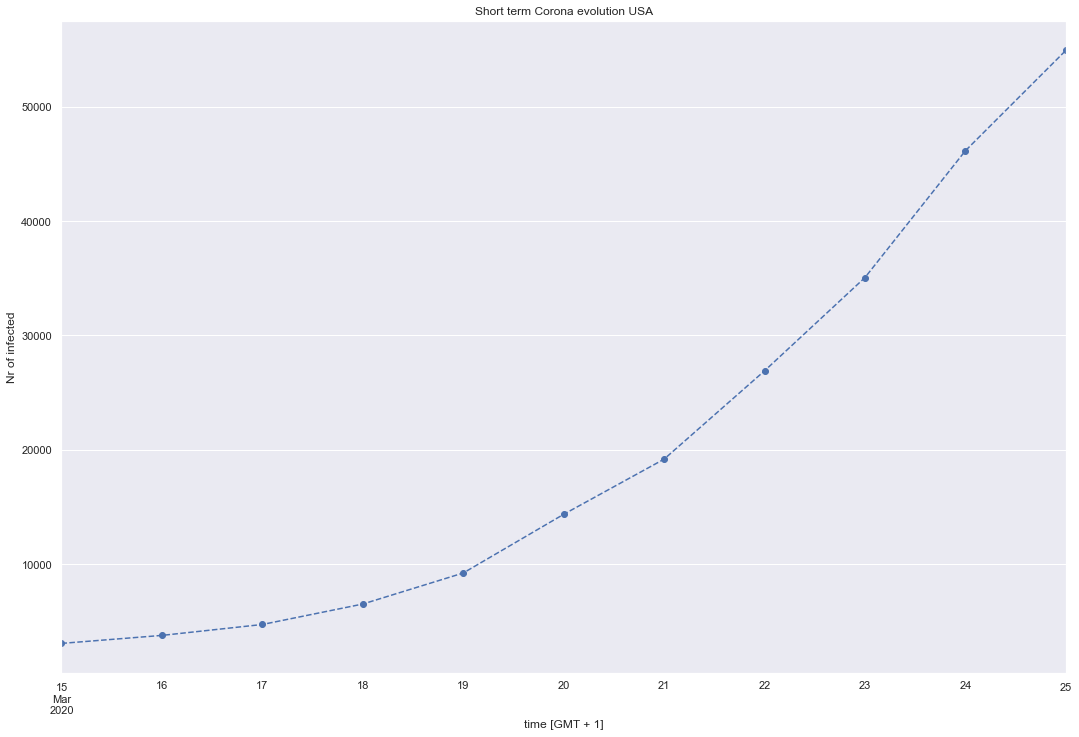

In [176]:


plt.figure(figsize=(18,12))
plt.title('Short term Corona evolution {}'.format(a_country.index[0][0]))
resample['confirmed'].plot(style ='o--')
#plt.xticks(rotation=90)
#plt.xticks(np.arange(len(index)),index.values)
plt.xlabel('time [GMT + 1]')

plt.ylabel('Nr of infected')
#plt.ylabel(r'Nr of infected [ $10^{x}$ ]')
#plt.yscale('log')

filename = 'corona_short_term_' + a_country.index[0][0] + '.jpg'
plt.savefig (filename,format='jpg')


In [177]:
top_dead_pct = df.loc[df['confirmed'] > 500].sort_values('dead_pct',ascending=False)
top_dead_pct

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor,datetime
Italy,69176.0,NaN,NaN,NaN,6820.0,NaN,8326.0,54030.0,3393.0,1144.0,9.86,NaN,2020-03-25 10:03:02
Indonesia,685.0,NaN,NaN,NaN,58.0,3.0,31.0,596.0,NaN,3.0,8.47,1.05,2020-03-25 10:03:02
Iran,24811.0,NaN,NaN,NaN,1934.0,NaN,8913.0,13964.0,NaN,295.0,7.79,NaN,2020-03-25 10:03:02
Spain,42058.0,NaN,NaN,NaN,2991.0,NaN,3794.0,35273.0,2636.0,900.0,7.11,NaN,2020-03-25 10:03:02
Philippines,636.0,552.0,84.0,1.15,38.0,3.0,26.0,572.0,1.0,6.0,5.97,1.09,2020-03-25 10:03:02
UK,8077.0,NaN,NaN,NaN,422.0,NaN,135.0,7520.0,20.0,119.0,5.22,NaN,2020-03-25 10:03:02
Netherlands,5560.0,NaN,NaN,NaN,276.0,NaN,2.0,5282.0,435.0,324.0,4.96,NaN,2020-03-25 10:03:02
France,22304.0,NaN,NaN,NaN,1100.0,NaN,3281.0,17923.0,2516.0,342.0,4.93,NaN,2020-03-25 10:03:02
China,81218.0,81171.0,47.0,1.00,3281.0,4.0,73650.0,4287.0,1399.0,56.0,4.04,1.00,2020-03-25 10:03:02
Japan,1193.0,NaN,NaN,NaN,43.0,NaN,285.0,865.0,54.0,9.0,3.60,NaN,2020-03-25 10:03:02


In [178]:
country_names = sorted(df.index.values)
#country_names

In [179]:
df.loc[df['confirmed'] > 500 ].sort_values('factor',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor,datetime
Russia,658.0,495.0,163.0,1.33,1.0,NaN,29.0,628.0,8.0,5.0,0.15,NaN,2020-03-25 10:03:02
South Africa,709.0,554.0,155.0,1.28,0.0,NaN,4.0,705.0,2.0,12.0,NaN,NaN,2020-03-25 10:03:02
Philippines,636.0,552.0,84.0,1.15,38.0,3.0,26.0,572.0,1.0,6.0,5.97,1.09,2020-03-25 10:03:02
Thailand,934.0,827.0,107.0,1.13,4.0,NaN,70.0,860.0,11.0,13.0,0.43,NaN,2020-03-25 10:03:02
Malaysia,1796.0,1624.0,172.0,1.11,17.0,1.0,183.0,1596.0,64.0,55.0,0.95,1.06,2020-03-25 10:03:02
Czechia,1497.0,1394.0,103.0,1.07,3.0,NaN,10.0,1484.0,19.0,140.0,0.20,NaN,2020-03-25 10:03:02
Israel,2030.0,1930.0,100.0,1.05,5.0,2.0,58.0,1967.0,37.0,235.0,0.25,1.67,2020-03-25 10:03:02
India,562.0,536.0,26.0,1.05,10.0,NaN,40.0,512.0,NaN,0.4,1.78,NaN,2020-03-25 10:03:02
Australia,2423.0,2317.0,106.0,1.05,8.0,NaN,118.0,2297.0,11.0,95.0,0.33,NaN,2020-03-25 10:03:02
Austria,5448.0,5283.0,165.0,1.03,30.0,2.0,9.0,5409.0,26.0,605.0,0.55,1.07,2020-03-25 10:03:02


In [180]:
top_10_per_m = df.sort_values('confirmed_per_M',ascending=False).head(10)
top_10_per_m

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor,datetime
San Marino,187.0,NaN,NaN,NaN,21.0,NaN,4.0,162.0,12.0,5511.0,11.23,NaN,2020-03-25 10:03:02
Vatican City,4.0,NaN,NaN,NaN,0.0,NaN,NaN,4.0,NaN,4994.0,NaN,NaN,2020-03-25 10:03:02
Faeroe Islands,132.0,122.0,10.0,1.08,0.0,NaN,38.0,94.0,2.0,2701.0,NaN,NaN,2020-03-25 10:03:02
Andorra,164.0,NaN,NaN,NaN,1.0,NaN,1.0,162.0,7.0,2123.0,0.61,NaN,2020-03-25 10:03:02
Iceland,648.0,NaN,NaN,NaN,2.0,NaN,51.0,595.0,13.0,1899.0,0.31,NaN,2020-03-25 10:03:02
Luxembourg,1099.0,NaN,NaN,NaN,8.0,NaN,6.0,1085.0,3.0,1756.0,0.73,NaN,2020-03-25 10:03:02
Liechtenstein,51.0,NaN,NaN,NaN,0.0,NaN,NaN,51.0,NaN,1338.0,NaN,NaN,2020-03-25 10:03:02
Switzerland,9991.0,9877.0,114.0,1.01,133.0,11.0,131.0,9727.0,141.0,1154.0,1.33,1.09,2020-03-25 10:03:02
Italy,69176.0,NaN,NaN,NaN,6820.0,NaN,8326.0,54030.0,3393.0,1144.0,9.86,NaN,2020-03-25 10:03:02
Spain,42058.0,NaN,NaN,NaN,2991.0,NaN,3794.0,35273.0,2636.0,900.0,7.11,NaN,2020-03-25 10:03:02


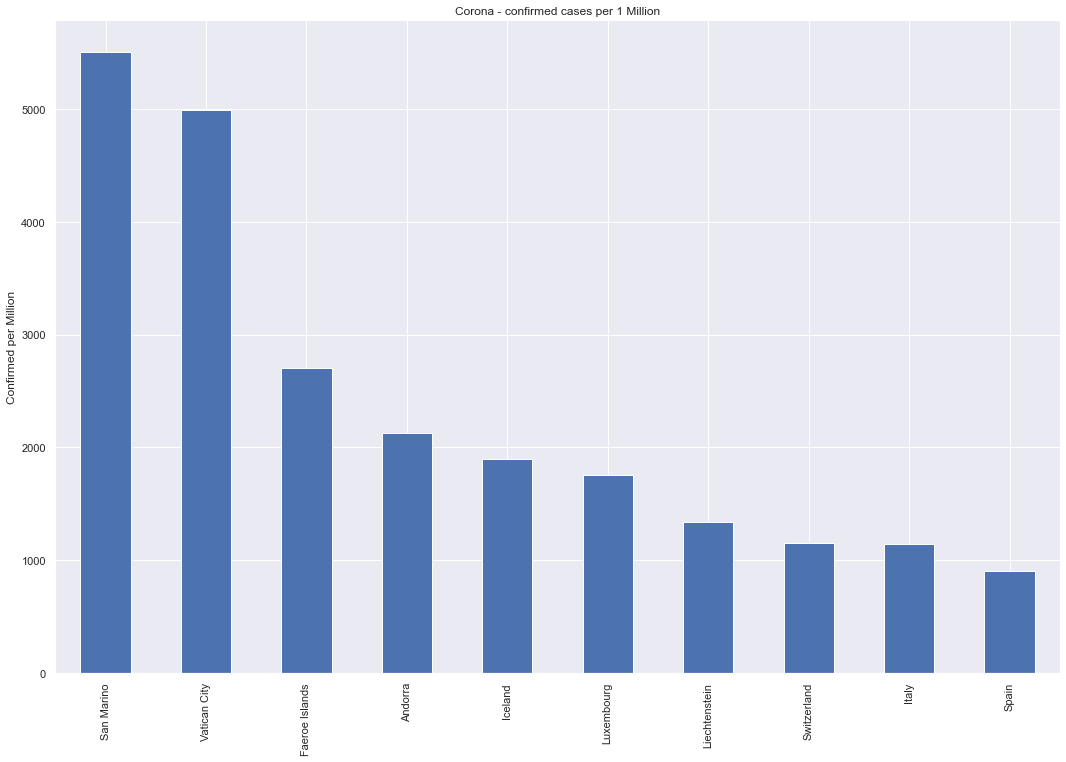

In [181]:
plt.figure(figsize=(18,12))
plt.title('Corona - confirmed cases per 1 Million')
plt.ylabel ('Confirmed per Million')
top_10_per_m['confirmed_per_M'].plot(kind='bar')
plt.savefig('confirmed_per_million.jpg',format='jpg')

In [182]:
totals = pd.DataFrame(df.sum(),columns=['totals'])
totals.drop(['factor','confirmed_per_M','dead_pct','datetime'],inplace=True)
totals

,totals
confirmed,4.3e+05
yesterday,2.1e+05
inc,2.5e+03
dead,1.9e+04
dead_inc,54
recovered,1.1e+05
active_cases,3e+05
serious,1.3e+04
dead_factor,26


In [183]:
country_names = list(sorted((df.index.unique().values)))
country_names

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'CAR',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'DRC',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guade

In [184]:
some_countries = ['Sweden','USA','Italy','Spain','Norway','Finland',
                  'Denmark','Singapore','S. Korea','China','Russia',
                 'Poland','Taiwan','Estonia','Germany','Austria','Belgium','France','Canada','Japan']
countries_of_interest = df.loc[some_countries,:]
countries_of_interest.sort_values('confirmed',inplace=True,ascending=False)
countries_of_interest

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor,datetime
China,81218.0,81171.0,47.0,1.00,3281.0,4.0,73650.0,4287.0,1399.0,56.0,4.04,1.00,2020-03-25 10:03:02
Italy,69176.0,NaN,NaN,NaN,6820.0,NaN,8326.0,54030.0,3393.0,1144.0,9.86,NaN,2020-03-25 10:03:02
USA,54935.0,54881.0,54.0,1.00,784.0,4.0,379.0,53772.0,1175.0,166.0,1.43,1.01,2020-03-25 10:03:02
Spain,42058.0,NaN,NaN,NaN,2991.0,NaN,3794.0,35273.0,2636.0,900.0,7.11,NaN,2020-03-25 10:03:02
Germany,33593.0,32991.0,602.0,1.02,164.0,5.0,3299.0,30130.0,23.0,401.0,0.49,1.03,2020-03-25 10:03:02
France,22304.0,NaN,NaN,NaN,1100.0,NaN,3281.0,17923.0,2516.0,342.0,4.93,NaN,2020-03-25 10:03:02
S. Korea,9137.0,9037.0,100.0,1.01,126.0,6.0,3730.0,5281.0,59.0,178.0,1.38,1.05,2020-03-25 10:03:02
Austria,5448.0,5283.0,165.0,1.03,30.0,2.0,9.0,5409.0,26.0,605.0,0.55,1.07,2020-03-25 10:03:02
Belgium,4269.0,NaN,NaN,NaN,122.0,NaN,461.0,3686.0,381.0,368.0,2.86,NaN,2020-03-25 10:03:02
Norway,2868.0,2866.0,2.0,1.00,13.0,1.0,6.0,2849.0,44.0,529.0,0.45,1.08,2020-03-25 10:03:02


In [185]:
countries_of_interest.sort_values('confirmed_per_M',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor,datetime
Italy,69176.0,NaN,NaN,NaN,6820.0,NaN,8326.0,54030.0,3393.0,1144.0,9.86,NaN,2020-03-25 10:03:02
Spain,42058.0,NaN,NaN,NaN,2991.0,NaN,3794.0,35273.0,2636.0,900.0,7.11,NaN,2020-03-25 10:03:02
Austria,5448.0,5283.0,165.0,1.03,30.0,2.0,9.0,5409.0,26.0,605.0,0.55,1.07,2020-03-25 10:03:02
Norway,2868.0,2866.0,2.0,1.00,13.0,1.0,6.0,2849.0,44.0,529.0,0.45,1.08,2020-03-25 10:03:02
Germany,33593.0,32991.0,602.0,1.02,164.0,5.0,3299.0,30130.0,23.0,401.0,0.49,1.03,2020-03-25 10:03:02
Belgium,4269.0,NaN,NaN,NaN,122.0,NaN,461.0,3686.0,381.0,368.0,2.86,NaN,2020-03-25 10:03:02
France,22304.0,NaN,NaN,NaN,1100.0,NaN,3281.0,17923.0,2516.0,342.0,4.93,NaN,2020-03-25 10:03:02
Estonia,369.0,NaN,NaN,NaN,0.0,NaN,8.0,361.0,4.0,278.0,NaN,NaN,2020-03-25 10:03:02
Denmark,1591.0,NaN,NaN,NaN,32.0,NaN,1.0,1558.0,69.0,275.0,2.01,NaN,2020-03-25 10:03:02
Sweden,2300.0,2299.0,1.0,1.00,40.0,NaN,16.0,2244.0,144.0,228.0,1.74,NaN,2020-03-25 10:03:02


In [186]:
european_countries = pd.read_csv('european_countries.csv',sep=';',
                     encoding='ISO-8859-1',header=None,
                     names=['country','population','region'],
                    thousands=',')
europe_names = list(european_countries['country'].values)

try:
    europe = df.loc[europe_names,:]
except KeyError:
    print ('some country from european_countries missing from dataset')
    
europe.sort_values('confirmed',ascending=False,inplace=True)
europe

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,dead_factor,datetime
Italy,69176.0,NaN,NaN,NaN,6820.0,NaN,8326.0,54030.0,3393.0,1144.0,9.86,NaN,2020-03-25 10:03:02
Spain,42058.0,NaN,NaN,NaN,2991.0,NaN,3794.0,35273.0,2636.0,900.0,7.11,NaN,2020-03-25 10:03:02
Germany,33593.0,32991.0,602.0,1.02,164.0,5.0,3299.0,30130.0,23.0,401.0,0.49,1.03,2020-03-25 10:03:02
France,22304.0,NaN,NaN,NaN,1100.0,NaN,3281.0,17923.0,2516.0,342.0,4.93,NaN,2020-03-25 10:03:02
Switzerland,9991.0,9877.0,114.0,1.01,133.0,11.0,131.0,9727.0,141.0,1154.0,1.33,1.09,2020-03-25 10:03:02
UK,8077.0,NaN,NaN,NaN,422.0,NaN,135.0,7520.0,20.0,119.0,5.22,NaN,2020-03-25 10:03:02
Netherlands,5560.0,NaN,NaN,NaN,276.0,NaN,2.0,5282.0,435.0,324.0,4.96,NaN,2020-03-25 10:03:02
Austria,5448.0,5283.0,165.0,1.03,30.0,2.0,9.0,5409.0,26.0,605.0,0.55,1.07,2020-03-25 10:03:02
Belgium,4269.0,NaN,NaN,NaN,122.0,NaN,461.0,3686.0,381.0,368.0,2.86,NaN,2020-03-25 10:03:02
Norway,2868.0,2866.0,2.0,1.00,13.0,1.0,6.0,2849.0,44.0,529.0,0.45,1.08,2020-03-25 10:03:02


In [187]:
europe_sum = europe[['confirmed','yesterday','inc','dead','dead_inc','recovered','active_cases']].sum()
europe_sum

confirmed       222146.0
yesterday        57733.0
inc               1356.0
dead             12306.0
dead_inc            26.0
recovered        19832.0
active_cases    190008.0
dtype: float64

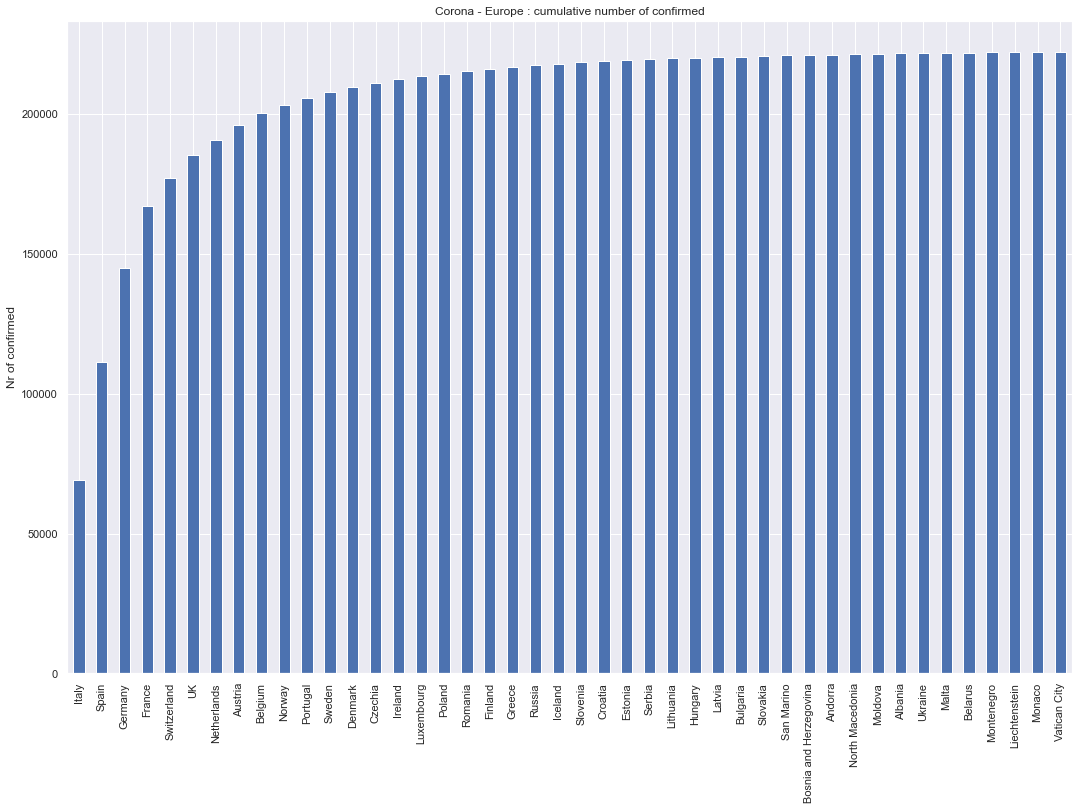

In [188]:
plt.figure(figsize=(18,12))
europe['confirmed'].cumsum().plot(kind='bar')
plt.title('Corona - Europe : cumulative number of confirmed')
plt.ylabel('Nr of confirmed')
plt.savefig('Corona_europe_cumulative.jpg',format='jpg')


In [189]:
def standardize(x):
    return (x - x.mean()) / x.std()

min_confirmed = 100
max_confirmed = 100000 # exclude e.g. China for better view

df_no_extrems = df.loc[ ( ( df['confirmed'] > min_confirmed  ) & ( df['confirmed'] < max_confirmed )) ]
df_no_extrems = df_no_extrems.loc[df_no_extrems['factor'] > 0]
df_no_extrems = df_no_extrems.loc[( 
    ( df_no_extrems['confirmed'] >= min_confirmed ) & (df_no_extrems['confirmed'] <= max_confirmed))]

x = df_no_extrems['confirmed_per_M']
x = standardize(x)
y = df_no_extrems['factor']
y = standardize(y)

In [190]:
# 

slope,intercept,_,_,_ = sps.linregress(x,y)

alpha_mu = 0
alpha_sigma = 1
beta_mu = 0
beta_sigma = 1


alpha = pm.Normal('alpha',mu=alpha_mu,tau = 1 / alpha_sigma ** 2)
beta = pm.Normal('beta',mu=beta_mu,tau = 1 / beta_sigma ** 2)

# by changing sigma from uniform to lognormal, the y-range of sample plot below
# shrunk a lot

sigma = pm.Uniform('sigma',lower=0,upper=10)

@pm.deterministic()
def linreq_mu(x=x,beta=beta,alpha=alpha):
    return x * beta + alpha

likelihood  = pm.Normal('likelihood',mu=linreq_mu,tau= 1 / sigma ** 2,
                       observed=True,value=y)

model = pm.Model([alpha,beta,sigma,linreq_mu,likelihood])
map_ = pm.MAP(model)
map_.fit()

mcmc = pm.MCMC(model)

mcmc.sample(10000,5000,2)

alpha_samples = mcmc.trace('alpha')[:]
beta_samples = mcmc.trace('beta')[:]
sigma_samples = mcmc.trace('sigma')[:]
linreq_mu_samples = mcmc.trace('sigma')[:]

result = pd.DataFrame({'alpha_post': alpha_samples,
                     'beta_post' : beta_samples,
                     'sigma_post' : sigma_samples,
                     'linreq_mu_post' : linreq_mu_samples})


 [-----------------100%-----------------] 10000 of 10000 complete in 19.3 sec

,alpha_post,beta_post,sigma_post,linreq_mu_post
count,2.50e+03,2500.00,2500.00,2500.00
mean,2.87e-02,-0.17,1.05,1.05
std,1.61e-01,0.19,0.15,0.15
min,-5.99e-01,-0.89,0.67,0.67
25%,-3.75e-02,-0.28,0.94,0.94
50%,2.53e-03,-0.17,1.04,1.04
75%,1.42e-01,-0.05,1.13,1.13
max,6.59e-01,0.45,1.65,1.65


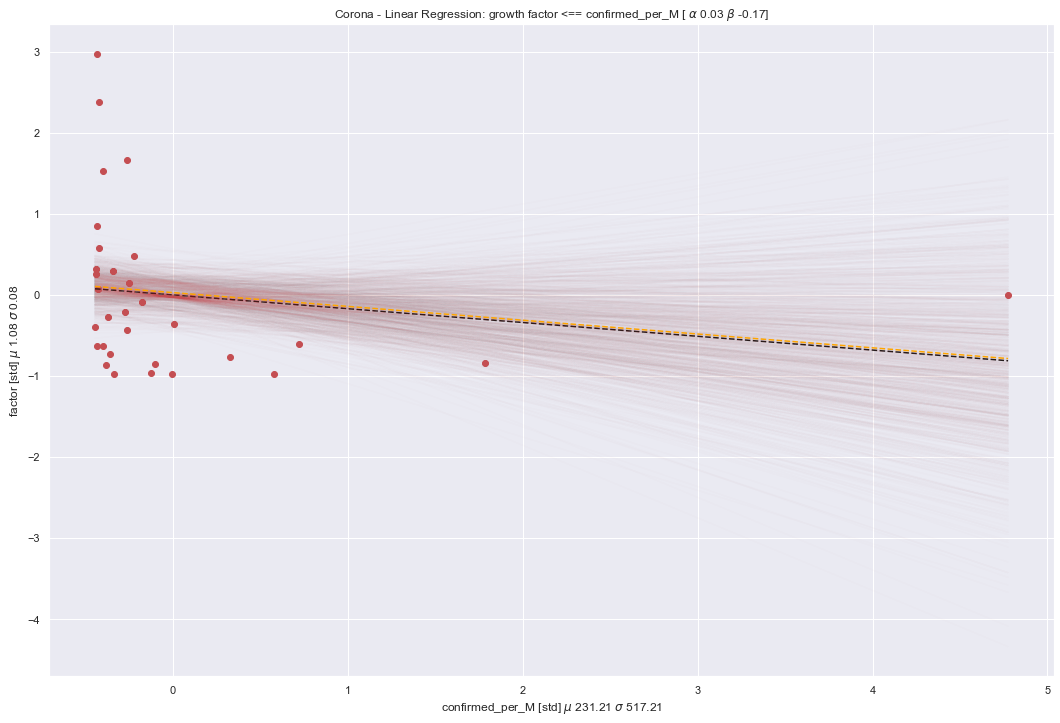

In [191]:

nr_rows = 100
nr_samples = 1000

alphas = np.random.choice(result['alpha_post'],replace=True,size=nr_samples)
betas = np.random.choice(result['beta_post'],replace=True,size=nr_samples)

X = np.linspace(x.min(),x.max(),nr_rows)

line_ys = np.array([X[i] * betas + alphas for i in range(len(X))])

plt.figure(figsize=(18,12))

line_alpha = result['alpha_post'].mean()
line_beta = result['beta_post'].mean()

plt.title(r'Corona - Linear Regression: growth factor <== confirmed_per_M [ $\alpha$ {:.2f} $\beta$ {:.2f}]'.format(
                                                                                        line_alpha,line_beta))

plt.ylabel(r'factor [std] $\mu$ {:.2f} $\sigma$ {:.2f}'.format(df_no_extrems['factor'].mean(),
                                                              df_no_extrems['factor'].std()))
plt.xlabel(r'confirmed_per_M [std] $\mu$ {:.2f} $\sigma$ {:.2f}'.format(df_no_extrems['confirmed_per_M'].mean(),
                                                             df_no_extrems['confirmed_per_M'].std()))
plt.scatter(x,y,color='r')
plt.plot(X,[X[i] * slope + intercept for i in range(len(X))],color='k',ls='dashed')
plt.plot(X,line_ys,color='r',alpha = 0.01)
plt.plot(X,[X[i] * result['beta_post'].mean() + result['alpha_post'].mean() for i in range(len(X))],
        color='orange',ls='dashed')
result.describe()


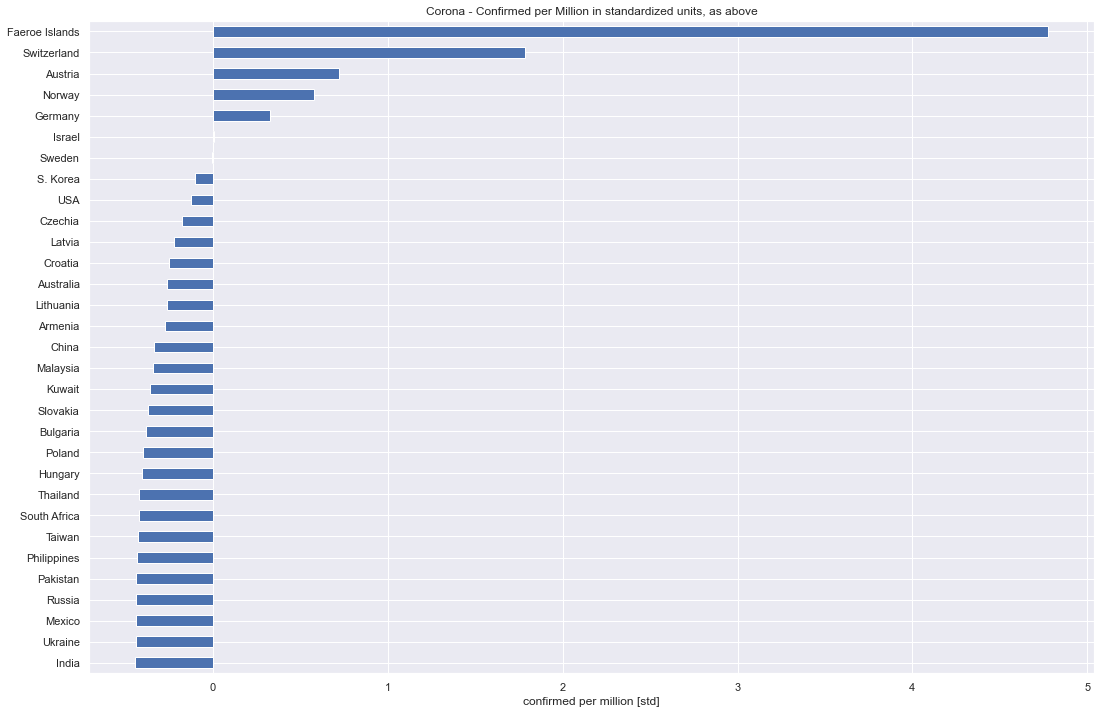

In [192]:
plt.figure(figsize=(18,12))
plt.title ('Corona - Confirmed per Million in standardized units, as above')
plt.xlabel('confirmed per million [std]')
#df_no_extrems['confirmed_per_M'].sort_values().plot(kind='barh')
std_values = standardize(df_no_extrems['confirmed_per_M'])
_= std_values.sort_values().plot(kind='barh')

